# **Chapter 04:**
Data Cleaning and Preparation with Pandas

---



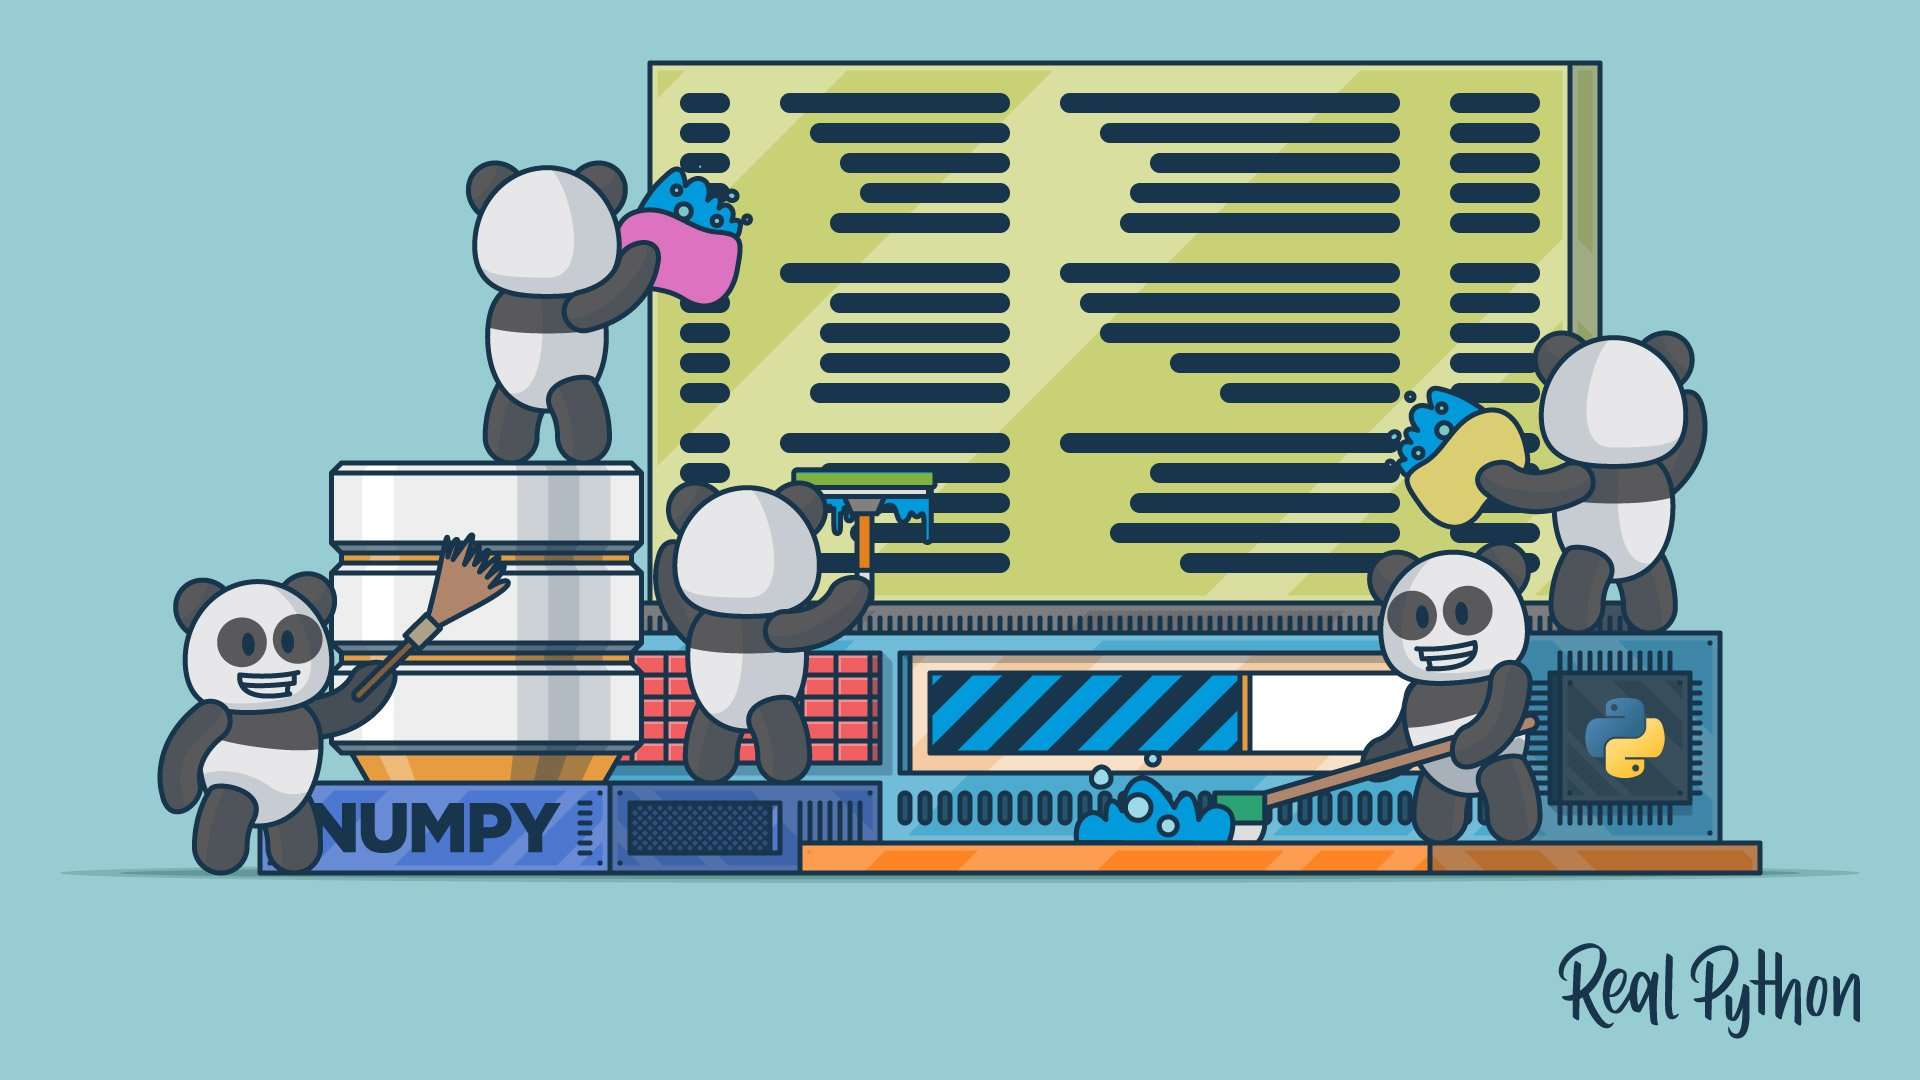

### What to look for?
* Missing Data
* Duplicated Data
* Outliers
* Type issues
* Inconsistant Data (eg : "Apple", "apple", "APPLE")
* Invalid Data (eg: “date of birth: male”, “address: -1234”)


## **LECTURE 01:** *Handling Missing Data*


### Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/DataAnalysis-with-Python

/content/drive/MyDrive/DataAnalysis-with-Python


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('titanic.csv')

### None: Pythonic missing data

* type object
* can't perform mathematical operations
* very expensive

In [ ]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

In [ ]:
vals1.sum()

TypeError: ignored

### NaN: Missing numerical data

In [ ]:
vals2 = np.array([1, np.nan, 3, 4]) 
vals2.dtype

dtype('float64')

In [ ]:
1 + np.nan

nan

In [ ]:
0 *  np.nan

nan

In [ ]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [ ]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

### NaN and None with Pandas

In [ ]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [ ]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [ ]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

### Operations

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed
- ``replace()``: Replace a string, regex, list, dictionary, series, number etc. from a dataframe.
- ``interpolate()``: Uses various interpolation technique to fill the missing values

isnull()

In [ ]:
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
data.Age.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

notnull()

In [ ]:
data.Age.notnull()

0       True
1       True
2       True
3       True
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: Age, Length: 891, dtype: bool

In [ ]:
data.Age[data.Age.notnull()]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

### Inconsistent null values

In [ ]:
df = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":["#NA", 2, 54, 3, "na"],
                   "C":[20, 16, "not applicable", 3, "n/a"],
                   "D":[14, 3, np.nan, None, 6],
                   "E":["N/A", 13, 0, 9, "N/a"],
                   "F":[34, 14, 23, 1, 7]})
df.to_csv("clean_me.csv")

In [ ]:
df = pd.read_csv("clean_me.csv", index_col=[0])
df.head()

,A,B,C,D,E,F
0,12.0,NaN,20,14.0,NaN,34
1,4.0,2,16,3.0,13,14
2,5.0,54,not applicable,NaN,0,23
3,NaN,3,3,NaN,9,1
4,1.0,na,NaN,6.0,N/a,7


In [ ]:
df.isnull().sum()

A    1
B    1
C    1
D    2
E    1
F    0
dtype: int64

In [ ]:
df = pd.read_csv("clean_me.csv", index_col=[0], na_values = ["N/a", "not applicable", "na"])
df.head()

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


In [ ]:
df.isnull().sum()

A    1
B    2
C    2
D    2
E    2
F    0
dtype: int64

## **LECTURE 02:** *Visualizing Missing Data*


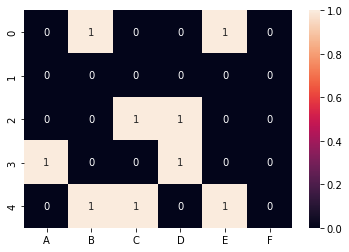

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, annot=True)

In [ ]:
import missingno as msno

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


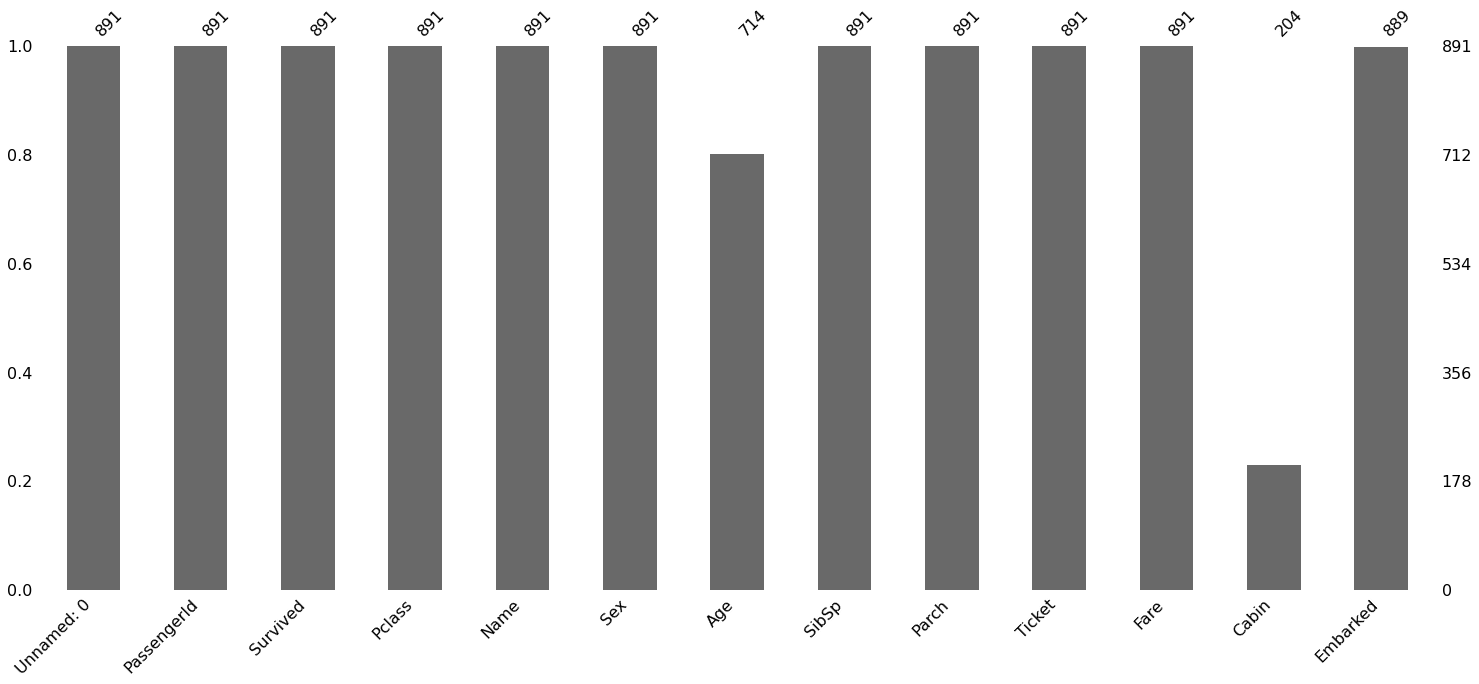

In [ ]:
msno.bar(data)

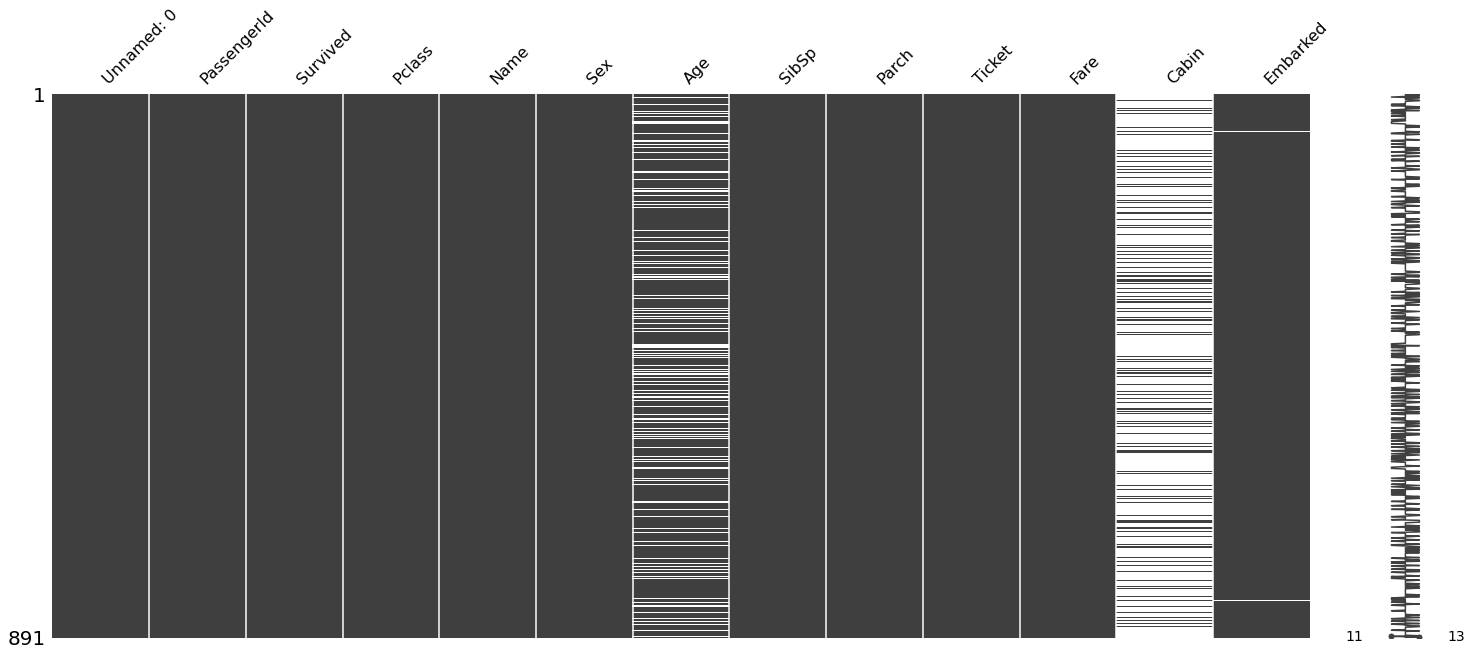

In [ ]:
# Gives positional information of the missing values
msno.matrix(data)

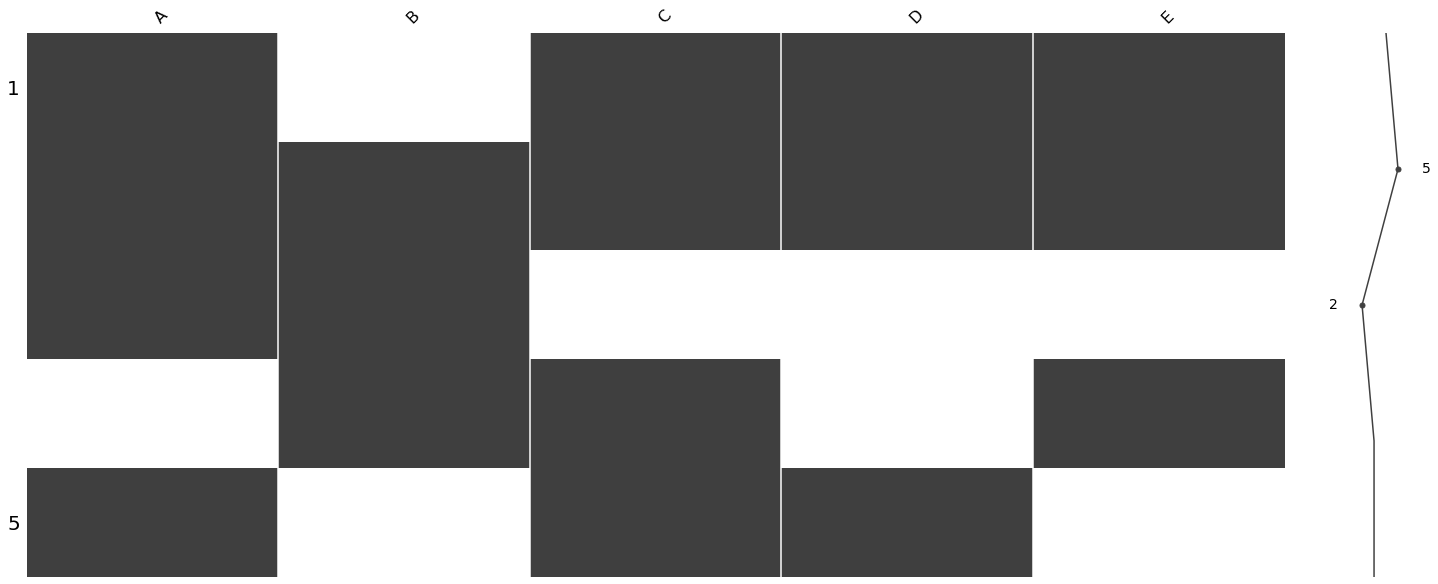

In [ ]:
msno.matrix(df)

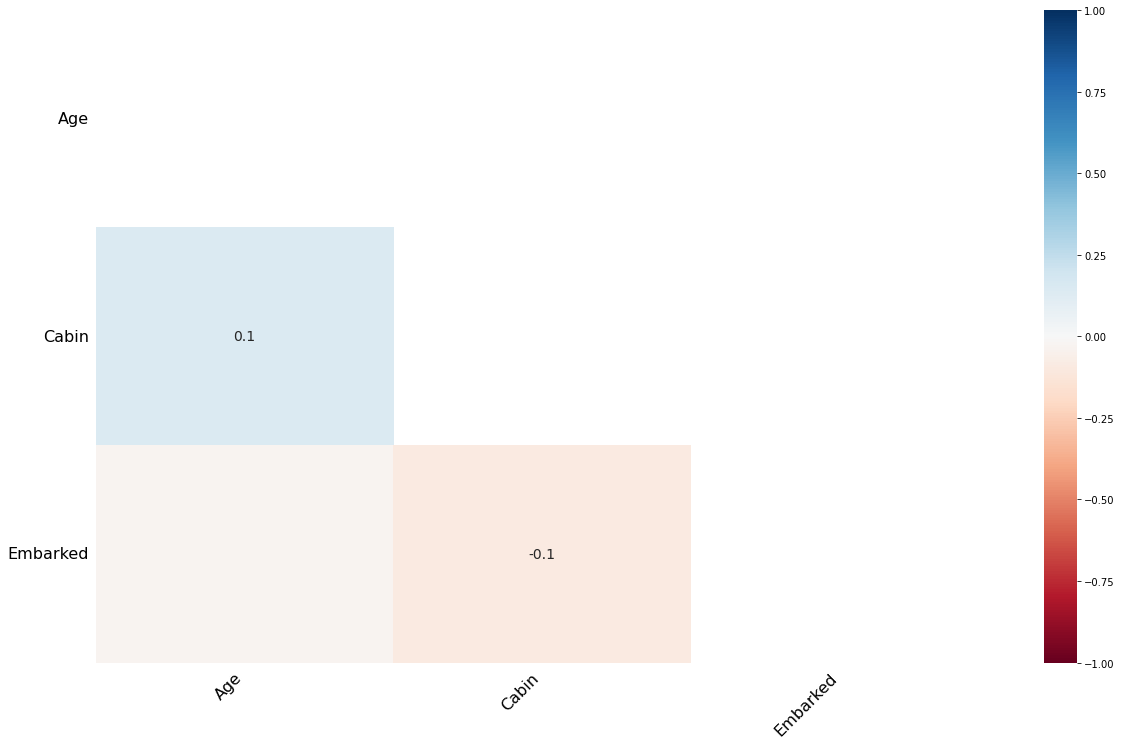

In [ ]:
# Gives a heatmap of how missing values are related
msno.heatmap(data)

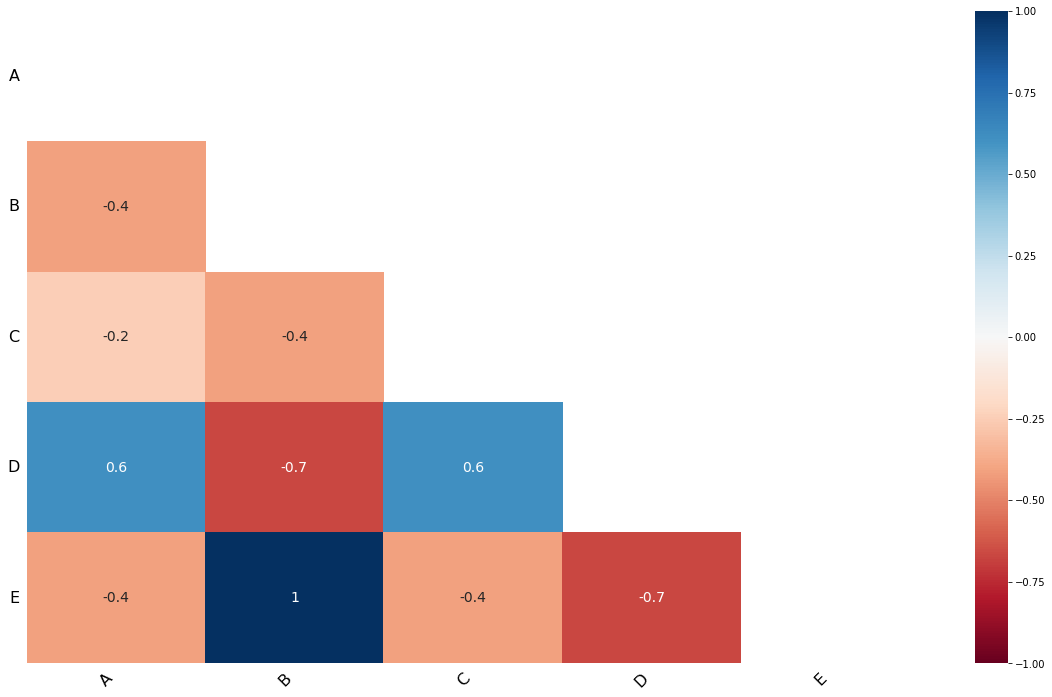

In [ ]:
msno.heatmap(df)

In [ ]:
df.head()

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


In [ ]:
# isnull().sum() will sum the number of missing values by columns
data_count_of_missval_by_col = (data.isnull().sum())
display(data_count_of_missval_by_col)

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# below code will display only the columns with missing values (in absolute number of rows)
display(data_count_of_missval_by_col[data_count_of_missval_by_col > 0])


Age         177
Cabin       687
Embarked      2
dtype: int64

In [ ]:
# below code will display only the columns with missing values (in percentage of missing values to the total rows)
(data_count_of_missval_by_col[data_count_of_missval_by_col > 0]/data.shape[0])*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

## **LECTURE 03:** *Deleting Missing Data*

before dropping, ask yourself. Are you dropping an important data/class?

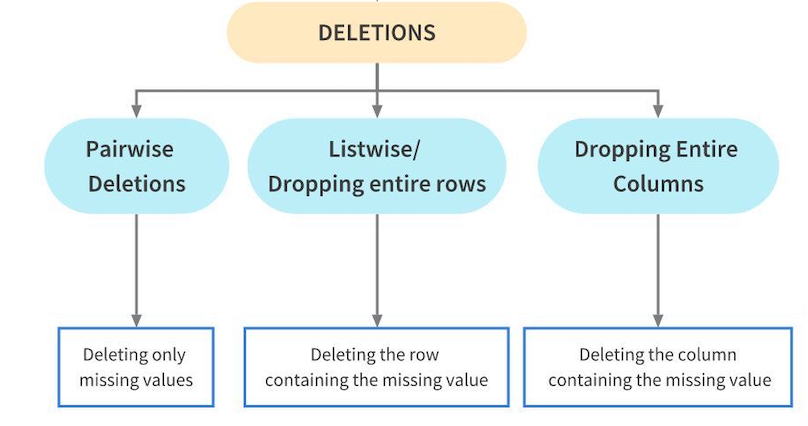

### Pairwise Deletion

In [ ]:
df.head()

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


In [ ]:
df.sum()

A    22.0
B    59.0
C    39.0
D    23.0
E    22.0
F    79.0
dtype: float64

In [ ]:
titanic_1 = data.copy()
titanic_1['Age'].mean() #pandas skips the missing values and calculates mean of the remaining values.

29.69911764705882

### Listwise Deletion/ Dropping rows

In [ ]:
df.dropna()

,A,B,C,D,E
1,4.0,2.0,16.0,3.0,13.0


In [ ]:
df.dropna(subset=['B'])

,A,B,C,D,E
1,4.0,2.0,16.0,3.0,13.0
2,5.0,54.0,NaN,NaN,0.0
3,NaN,3.0,3.0,NaN,9.0


In [ ]:
df.dropna(axis='rows', thresh=4) # non-null values > 4 -> dont delete

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1


### Dropping complete columns

In [ ]:
df.dropna(axis='columns')

,F
0,34
1,14
2,23
3,1
4,7


In [ ]:
df.dropna(subset=['D', 'C'], how='all')

In [ ]:
df.dropna(axis=1, how='all')

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


drop if a column have less then 4 non-null values

In [ ]:
df.dropna(axis='columns', thresh=4)

,A,F
0,12.0,34
1,4.0,14
2,5.0,23
3,NaN,1
4,1.0,7


drop if a column has less then 80% of non-null values  
    OR  
drop if a column has only 20% of non-null values

In [ ]:
df.dropna(axis=1, thresh = int(0.8*df.shape[0])) # thresh = 4

,A,F
0,12.0,34
1,4.0,14
2,5.0,23
3,NaN,1
4,1.0,7


In [ ]:
df.dropna(axis=1, thresh = 4)

,A,F
0,12.0,34
1,4.0,14
2,5.0,23
3,NaN,1
4,1.0,7


## **LECTURE 04:** *Interpolating Data*

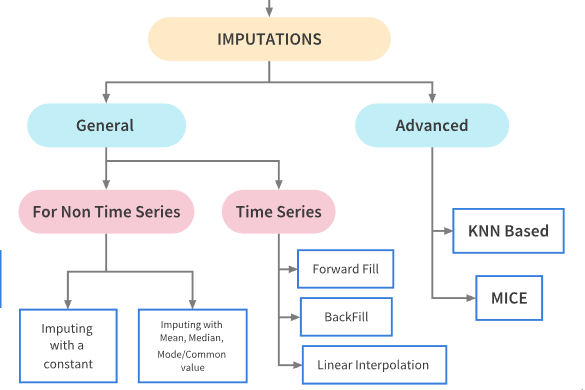

### Using fillna

In [ ]:
data.Age.fillna(23)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    23.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
data.Age.fillna(data.Age.mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [ ]:
data.Age.fillna(method='ffill')

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    19.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [ ]:
data.Age.fillna(method='bfill')

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    26.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### Using replace()

In [ ]:
df.replace(to_replace = np.nan, value = -99) 

,A,B,C,D,E,F
0,12.0,-99.0,20.0,14.0,-99.0,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,-99.0,-99.0,0.0,23
3,-99.0,3.0,3.0,-99.0,9.0,1
4,1.0,-99.0,-99.0,6.0,-99.0,7


In [ ]:
df.replace(to_replace = 1, value = -100) 

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,NaN,NaN,0.0,23
3,NaN,3.0,3.0,NaN,9.0,-100
4,-100.0,NaN,NaN,6.0,NaN,7


### Using Interpolate()

In [ ]:
df.interpolate(method ='linear', limit_direction ='forward')

,A,B,C,D,E,F
0,12.0,NaN,20.0,14.0,NaN,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,9.5,4.0,0.0,23
3,3.0,3.0,3.0,5.0,9.0,1
4,1.0,3.0,3.0,6.0,9.0,7


In [ ]:
df.interpolate(method ='linear', limit_direction ='backward', limit = 1)

,A,B,C,D,E,F
0,12.0,2.0,20.0,14.0,13.0,34
1,4.0,2.0,16.0,3.0,13.0,14
2,5.0,54.0,9.5,NaN,0.0,23
3,3.0,3.0,3.0,5.0,9.0,1
4,1.0,NaN,NaN,6.0,NaN,7


### Using Simple Imputer

In [ ]:
# imputing with a constant

from sklearn.impute import SimpleImputer

df2 = df.copy()
imputer = SimpleImputer(strategy='constant') # imputing using constant value
df2.iloc[:,:] = imputer.fit_transform(df2)
df2.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
dtype: int64

In [ ]:
df2

,A,B,C,D,E,F
0,12.0,0.0,20.0,14.0,0.0,34.0
1,4.0,2.0,16.0,3.0,13.0,14.0
2,5.0,54.0,0.0,0.0,0.0,23.0
3,0.0,3.0,3.0,0.0,9.0,1.0
4,1.0,0.0,0.0,6.0,0.0,7.0


In [ ]:
imputer = SimpleImputer(strategy='constant', fill_value=1)
imputer.fit_transform(df)

array([[12.,  1., 20., 14.,  1., 34.],
       [ 4.,  2., 16.,  3., 13., 14.],
       [ 5., 54.,  1.,  1.,  0., 23.],
       [ 1.,  3.,  3.,  1.,  9.,  1.],
       [ 1.,  1.,  1.,  6.,  1.,  7.]])

In [ ]:
imputer = SimpleImputer(strategy='constant', fill_value=1,  add_indicator=True)
imputer.fit_transform(df)

array([[12.,  1., 20., 14.,  1., 34.,  0.,  1.,  0.,  0.,  1.],
       [ 4.,  2., 16.,  3., 13., 14.,  0.,  0.,  0.,  0.,  0.],
       [ 5., 54.,  1.,  1.,  0., 23.,  0.,  0.,  1.,  1.,  0.],
       [ 1.,  3.,  3.,  1.,  9.,  1.,  1.,  0.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  6.,  1.,  7.,  0.,  1.,  1.,  0.,  1.]])

If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data.

In [ ]:
imputer = SimpleImputer(strategy='most_frequest', fill_value=1,  add_indicator=True) # can also be mean/ median
imputer.fit_transform(df)

## **LECTURE 05:** *Removing duplicate values*

In [ ]:
data.Cabin.duplicated()

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
data.duplicated(subset=['Survived', 'Pclass', 'Sex'])

0      False
1      False
2      False
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Length: 891, dtype: bool

In [ ]:
data.duplicated(subset=['Survived', 'Pclass', 'Sex']).sum()

879

In [ ]:
data.duplicated().sum()

0

In [ ]:
sample1 = data.sample(5)
data2 = data.append(sample1)
data2.duplicated().sum()

5

In [ ]:
#@title View Rows with duplicated values using loc
data2.loc[data2.duplicated(), :]

In [ ]:
data2.drop_duplicates()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new2
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.00
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.00
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.00
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.00
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.00
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.00
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,21.75
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.00


In [ ]:
data2.drop_duplicates(keep='last')

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new2
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,321,322,0,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,NaN,S,27.0
460,460,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S,48.0
606,606,607,0,3,"Karaic, Mr. Milan",male,30.0,0,0,349246,7.8958,NaN,S,30.0
607,607,608,1,1,"Daniel, Mr. Robert Williams",male,27.0,0,0,113804,30.5000,NaN,S,27.0


In [ ]:
# To drop all duplicates
data2.drop_duplicates(keep=False)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new2
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.00
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.00
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.00
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.00
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.00
887,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.00
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,21.75
889,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.00


In [ ]:
# Considering certain columns for dropping duplicates
data2.drop_duplicates(subset=['Survived', 'Pclass', 'Sex'])

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new2
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.000000
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,14.000000
14,14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,14.000000
17,17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,30.740707
20,20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S,35.000000
23,23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,28.000000
36,36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,26.507589


### Imputing with strategy

In [ ]:
mean_ages = data.groupby(['Sex','Pclass'])['Age'].mean()

def remove_na_ages(row):
    '''
    function to check if the age is null and replace wth the mean from 
    the mean ages dataframe 
    '''
    if pd.isnull(row['Age']): #female - 1
        return mean_ages[row['Sex'],row['Pclass']]
    else:
        return row['Age']

In [ ]:
data['Age_new2'] = data.apply(remove_na_ages, axis=1)

## **LECTURE 00:** *Parsing Dates*

## **LECTURE 00:** *Detecting and Filtering Outliers*

## **LECTURE 00:** *Regular Expressions*